Importowanie 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

**Zbiór danych New York Times**

Ładowanie zbioru danych

In [2]:
df = pd.read_csv('./nyt-frame.csv', header = 0)
data = df.iloc[:, 9:]
array = data.values

Wyświetlanie dwudziestu losowych elementów słownika

In [3]:
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['bust' 'forget' 'wooster' 'strongest' 'complexity' 'wrote' 'dark' 'icons'
 'grow' 'turner' 'characteristic' 'periods' 'thin' 'offices' 'plays'
 'simpsons' 'canadian' 'computers' 'raphael' 'record']


Transformacja PCA

In [4]:
pca = PCA()
X_pca = pca.fit_transform(array)

15 elementów o największej wartości dla pierwszego komponentu

In [6]:
indices = sorted(enumerate(pca.components_[0]), 
                             key=lambda x: x[1], reverse=False)

top_indices = indices[:15]

for i, value in top_indices:
    print(i, header[i])

2529 music
4099 trio
3963 theater
2707 orchestra
799 composers
2691 opera
3964 theaters
2300 m
3032 program
2905 players
1457 festival
1202 east
4401 y
2059 jersey
3898 symphony


15 elementów o najmniejszej wartości dla pierwszego komponentu

In [7]:
indices = sorted(enumerate(pca.components_[0]), 
                             key=lambda x: x[1], reverse=True)

top_indices = indices[:15]

for i, value in top_indices:
    print(i, header[i])

3530 she
1794 her
2517 ms
1875 i
3394 said
2498 mother
875 cooper
2538 my
2761 painting
3013 process
2762 paintings
1899 im
2516 mrs
1771 he
2373 me


15 elementów o największej wartości dla drugiego komponentu

In [8]:
indices = sorted(enumerate(pca.components_[1]), 
                             key=lambda x: x[1], reverse=False)

top_indices = indices[:15]

for i, value in top_indices:
    print(i, header[i])

235 art
2527 museum
1901 images
244 artists
1139 donations
2528 museums
2761 painting
3922 tax
2762 paintings
3450 sculpture
1606 gallery
3451 sculptures
2757 painted
4315 white
3502 service


15 elementów o najmniejszej wartości dla drugiego komponentu

In [9]:
indices = sorted(enumerate(pca.components_[1]), 
                             key=lambda x: x[1], reverse=True)

top_indices = indices[:15]

for i, value in top_indices:
    print(i, header[i])

1794 her
3530 she
3963 theater
2691 opera
2517 ms
1875 i
1851 hour
3408 sang
3022 production
1457 festival
2529 music
2530 musical
3665 songs
2707 orchestra
4233 vocal


Projekcja PCA

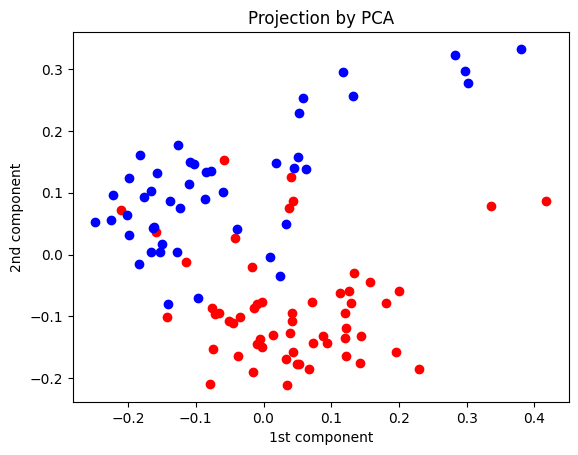

In [10]:
classes = df["class.labels"].values

reds = np.where(classes == "art")[0]
blues = np.where(classes == "music")[0]

plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

Wykres zależności wartości wariancji od ilości kompnentów

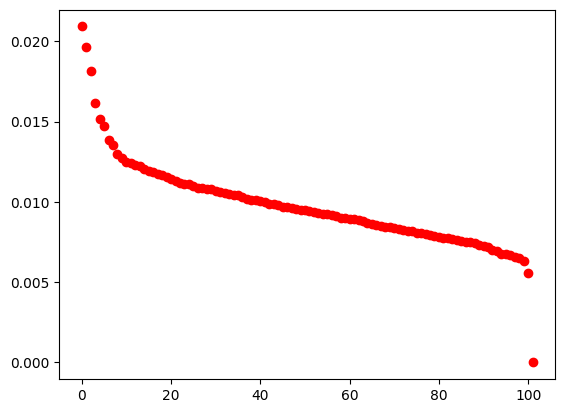

0.15773478029003501


In [11]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(sum(variance_ratio[0:10]))

**Zbiór danych 04Cars**

Dodatkowe importy

In [12]:
from sklearn.preprocessing import StandardScaler

Ładowanie zbioru danych z pominięciem 11 ostatnich kolumn

In [13]:
df = pd.read_csv('./04cars-data.csv', header = 0)
data = df.iloc[:, -11:]

print(data)

     Retail Price  Dealer Cost  Engine Size (l)  Cyl   HP  City MPG  Hwy MPG  \
0           43755        39014              3.5    6  225        18       24   
1           46100        41100              3.5    6  225        18       24   
2           36945        33337              3.5    6  265        17       23   
3           89765        79978              3.2    6  290        17       24   
4           23820        21761              2.0    4  200        24       31   
..            ...          ...              ...  ...  ...       ...      ...   
382         37730        35542              2.9    6  208        20       28   
383         45210        42573              2.9    6  268        19       26   
384         26135        24641              1.9    4  170        22       29   
385         35145        33112              2.5    5  208        20       27   
386         41250        38851              2.9    6  268        15       20   

     Weight  Wheel Base  Len  Width  
0

Przeskalowanie wartości

In [17]:
scaler = StandardScaler()

normalized_data = scaler.fit_transform(data)

Transformacja PCA

In [18]:
pca = PCA()
X_pca = pca.fit_transform(normalized_data)

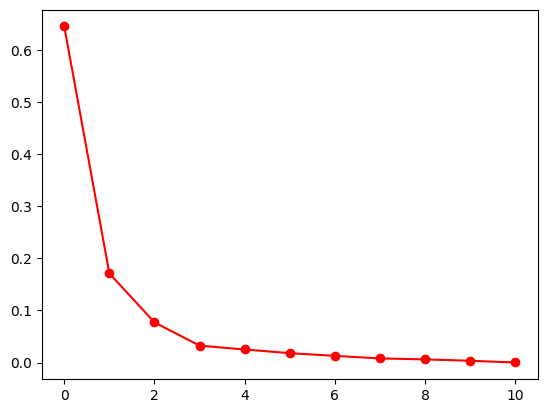

0.9999281495692194


In [19]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro-')
plt.show()
print(sum(variance_ratio[0:10]))

In [20]:
attributes = list(data.columns.values[:11])

pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]
pc_loadings = pca.components_.T
models_to_plot = 2

print('Attribute, PC1, PC2')

for i in range(0, pc1.shape[0]):
    print(f"{attributes[i]}:{pc1[i]}:{pc2[i]}")

Attribute, PC1, PC2
Retail Price:-0.2637504434440343:0.46850869750253904
Dealer Cost:-0.262318638753095:0.4701465851382262
Engine Size (l):-0.34708049202520086:-0.01534718646371361
Cyl:-0.33418875762863703:0.07803201087501885
HP:-0.3186022584840292:0.2922134761391824
City MPG:0.3104817267323127:-0.0033659357616592604
Hwy MPG:0.3065886385804443:-0.010964460145348904
Weight:-0.3363293669404879:-0.16746357154787042
Wheel Base:-0.26621003357105427:-0.41817710695920457
Len:-0.2567901876706822:-0.4084113806687548
Width:-0.2960545914170611:-0.3128913501625073


Największe elementy pierwszego komponentu wiodącego są związane z długością pojazdu, zaś najmniejsze z jego wagą.
Największe elementy drugiego kompnentu wiodącego są związane z jego ceną, zaś najmniejsze z rozstawem osi (wheel base).

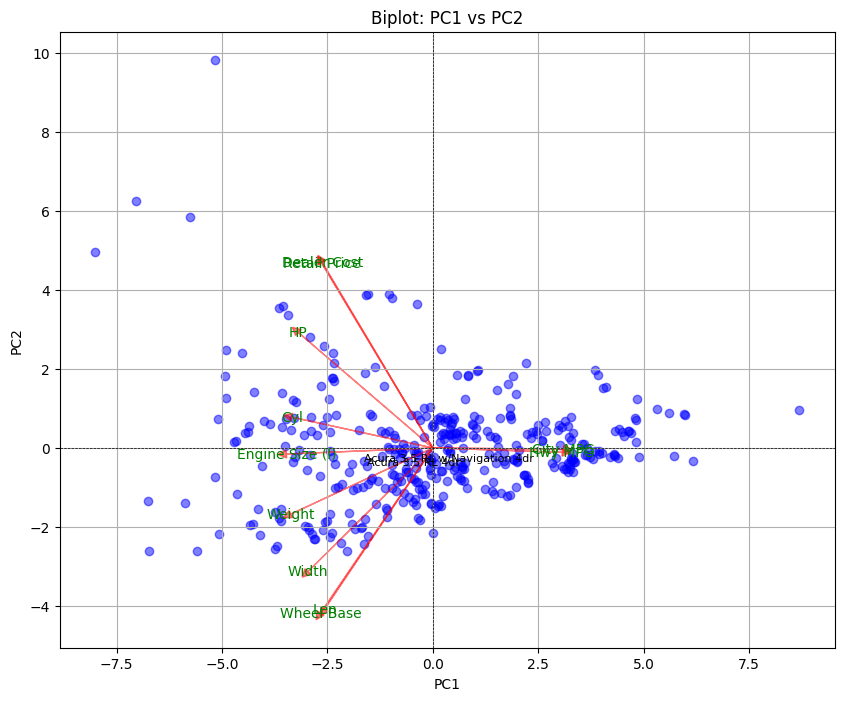

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot: PC1 vs PC2')

for i, model in enumerate(df['Vehicle Name'].head(models_to_plot)):
    plt.annotate(model, (X_pca[i, 0], X_pca[i, 1]), fontsize=8)

for i, (x, y) in enumerate(zip(pc_loadings[:, 0], pc_loadings[:, 1])):
    scale = 10
    plt.arrow(0, 0, scale*x, scale*y, color='r', alpha=0.5, head_width=0.2, head_length=0.2)
    plt.text(scale*x, scale*y, data.columns[i], color='g', ha='center', va='center')

plt.grid()
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.show()

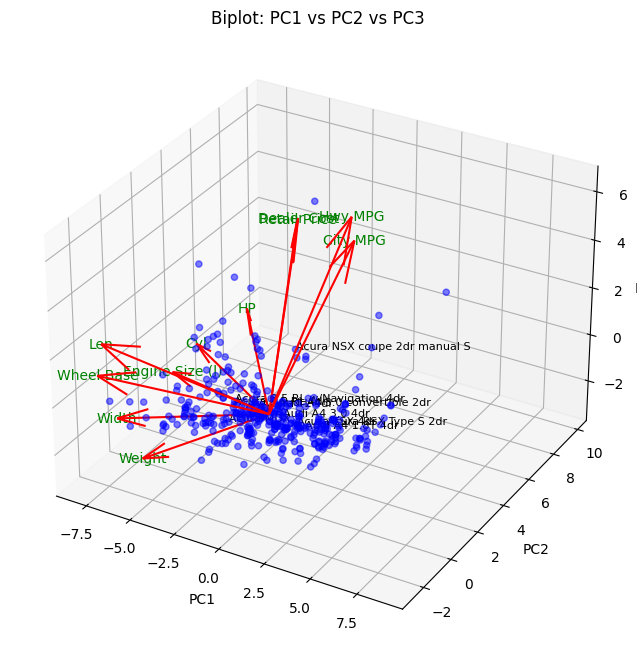

In [24]:
models_to_plot = 10

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c='b', alpha=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Biplot: PC1 vs PC2 vs PC3')

for i, model in enumerate(df['Vehicle Name'].head(models_to_plot)):
    ax.text(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], model, fontsize=8)

for i, (x, y, z) in enumerate(zip(pc_loadings[:, 0], pc_loadings[:, 1], pc_loadings[:, 2])):
    scale = 15
    ax.quiver(0, 0, 0, scale*x, scale*y, scale*z, color='r', arrow_length_ratio=0.2)
    ax.text(scale*x, scale*y, scale*z, data.columns[i], color='g', ha='center', va='center')

plt.show()

Taki rodzaj wizualizacji pozwala zobrazować korelację między zmiennymi - im bardziej zbliżony jest kierunek wektorów, tym bardziej skorelowane są reprezentowane przez nie zmienne.